# Homework 9 (DL Monday, December 4 at 12:00 PM)
#### ELEC-E8740 - Basics of sensor fusion - Autumn 2023

In [1]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

#### Consider the following 1D non-linear model
$$
x_k = x_{k-1} - 0.01sin(x_{k-1}) + q_{k-1}\\
y_k = 0.5sin(2x_k)+ r_k
$$
where $q_{k-1}$ has variance of $0.01^2$ and $r_k$ has variance of $0.02^2$.

### Part a (1 point): Simulate 100 steps of states and measurements from the model. Plot the data.

In [2]:
def model_simulation(seed_number, steps):
    """ 
    1D non-linear model simulation
    -------
    Input:
        seed_number: it is used to generate the same sequence of random numbers
        steps: number of steps
    Output:
        xs: state trajectory
        ys: measurement tajectory
        
    """
    np.random.seed(seed_number)      # do not change this line
    xs = np.zeros((steps, 1))        # do not change this line
    ys = np.zeros((steps, 1))        # do not change this line
    # To draw random samples from a normal (Gaussian) distribution, you could use np.random.normal function
    # Attention: the arguments of np.random.normal are mean and "Standard deviation"
    # YOUR CODE HERE
    for i in range(1, steps):
        q = np.random.normal(0, 0.01)
        r = np.random.normal(0, (0.02))
        xs[i] = xs[i-1] -0.01*np.sin(xs[i-1]) + q
        ys[i] = 0.5*np.sin(2*xs[i]) + r
    # raise NotImplementedError()
    return xs, ys # do not change this line

Feel free to uncomment and run the given code below.

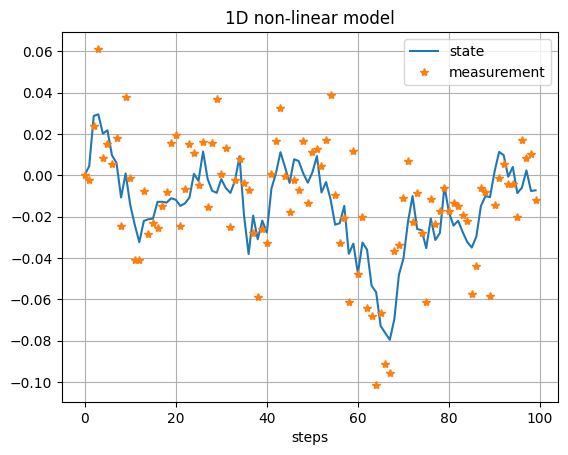

In [3]:
xs, ys = model_simulation(5, 100)
plt.plot(xs, label='state')
plt.plot(ys, '*', label='measurement')
plt.title('1D non-linear model')
plt.xlabel('steps')
plt.legend()
plt.grid();

[19.31026554]
[6.04115692]
[11.51487869]
[19.39143113]
[14.2387807]
[15.52237673]
[0.13070862]
[12.48618438]
[17.83918996]
[19.68730659]
[12.66546394]
[4.50524091]
[18.79097128]
[16.77513439]
[18.51302723]
[17.09334127]
[19.86155505]
[18.67796496]
[13.26348799]
[10.82989879]
[15.50373531]
[13.61388157]
[19.94692254]
[15.8571232]
[16.82957358]
[13.6528657]
[14.36308909]
[16.81071925]
[10.26676067]
[12.04962918]
[14.83893173]
[6.96471085]
[5.3594446]
[2.80487965]
[18.64418626]
[18.91451681]
[17.85373159]
[15.38120485]
[12.85187981]
[6.79757919]
[0.22467999]
[13.37187008]
[19.91585495]
[1.4279683]
[19.71753863]
[19.93356081]
[19.23775468]
[19.60447966]
[10.64646584]
[10.5964915]
[18.55351643]
[19.89462548]
[17.35853961]
[17.11346582]
[19.3072973]
[1.34219372]
[11.14583184]
[8.72756535]
[11.24759648]
[19.7749111]
[19.94442372]
[18.78931116]
[14.1580187]
[11.61878138]
[16.09422698]
[12.24819202]
[18.1182373]
[17.48715873]
[13.80935596]
[19.81221946]
[16.00609542]
[19.82992343]
[9.10361651]


/tmp/ipykernel_62703/2092001384.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j] = weights[j]*likelihood


[0.29259883]
[19.37160566]
[19.76335945]
[19.06454477]
[5.19182966]
[19.5850665]
[15.77614966]
[0.34623446]
[0.3909761]
[1.96734327]
[0.69539903]
[2.83139308]
[0.81660109]
[19.08837999]
[5.43721721]
[2.99222153]
[4.69523778]
[17.5158336]
[0.00099453]
[7.91306356]
[19.91530987]
[13.04730991]
[8.59262058]
[9.60859515]
[0.0969116]
[2.70339655]
[18.3238388]
[17.93696492]
[11.49378824]
[0.53571171]
[9.73164793]
[0.83428735]
[0.74109647]
[2.90519873]
[13.03004047]
[19.88267682]
[8.53236203]
[0.74156188]
[16.51811074]
[14.22951996]
[0.97162758]
[3.78775328]
[0.00079375]
[16.42392404]
[16.91027847]
[0.11233579]
[0.00035691]
[1.00320485]
[1.14047291]
[0.29334865]
[16.9148774]
[6.18153774]
[14.59422911]
[10.11201501]
[6.7423429]
[5.95025455]
[0.28172428]
[10.91334388]
[14.00315626]
[9.7353112]
[1.08940773]
[18.14428275]
[4.2542463]
[13.7513281]
[3.16554998]
[14.24040924]
[11.23942892]
[16.4613287]
[16.43147931]
[0.09940887]
[19.9297004]
[14.60326122]
[18.0106706]
[3.29248926]
[10.94448592]
[0.12

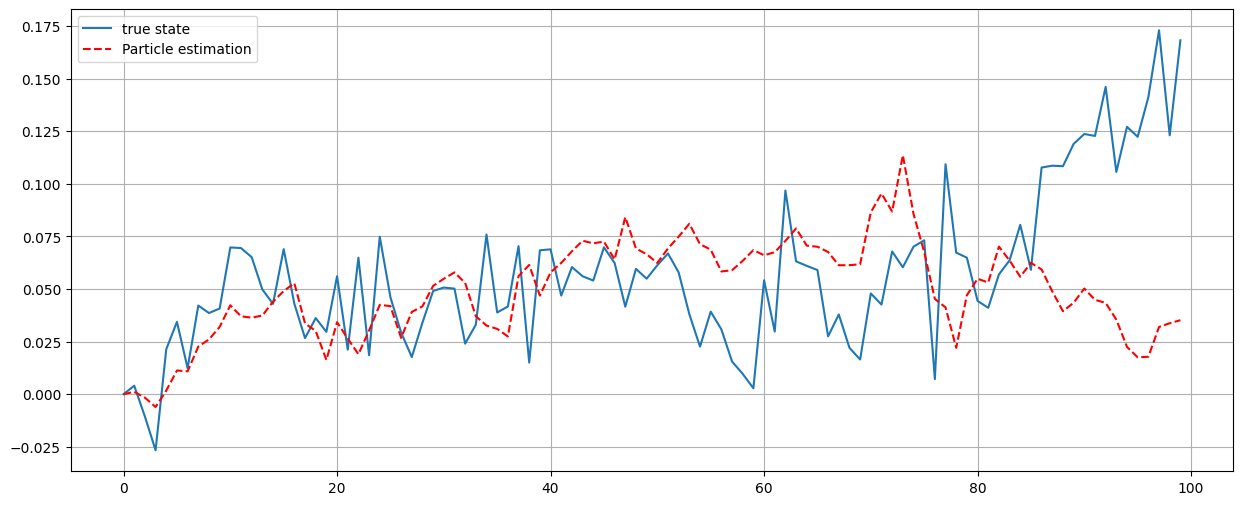

In [4]:
Number_of_particles = 100
def particle_init(seed,Number_of_particles,mean,std):
    # np.random.seed(seed)
    particles = np.random.normal(mean, std, Number_of_particles)
    # particles = np.random.uniform(-np.pi, np.pi, Number_of_particles)
    return particles
def propagateParticles(particle,seed):
    # np.random.seed(seed)
    return particle - 0.01*np.sin(particle) + np.random.normal(0, 0.01)
def compulteLikehood(particle,measurement,seed):
    # np.random.seed(seed)
    y_pred = 0.5*np.sin(2*particle) + np.random.normal(0, 0.02)
    likelyhood = 1/np.sqrt(2*np.pi*0.02**2)*np.exp(-(measurement-y_pred)**2/(2*0.02**2))
    return likelyhood
def resample(particles,weights):
    indices = np.random.choice(np.arange(len(particles)),len(particles),p=weights,replace=True)
    # resampled_particles = [particles[i] for i in indices]
    return particles[indices]

def bootstrap_particle_filter(seed,measurements):
    step = len(measurements)
    mean = np.zeros((step,1))
    var = np.zeros((step,1,1))
    Number_of_particles = 500
    weights = np.ones((Number_of_particles))

    particles = particle_init(seed,Number_of_particles,0,0.01)
    for i in range(1, step):
        for j,particle in enumerate(particles):
            particles[j] = propagateParticles(particle,seed)
            likelihood = compulteLikehood(particle,measurements[i],seed)
            print(likelihood)
            weights[j] = weights[j]*likelihood
        weights = weights/np.sum(weights)
        #calculate the weighted mean
        mean[i] = np.sum(weights*particles)
        #calculate the weighted variance
        var[i]= np.sum(weights*(particles-mean[i])**2)
        #resample
        particles = resample(particles,weights)
            
        # YOUR CODE HERE
        # raise NotImplementedError()
    return mean, var
    
observations =  model_simulation(1, 100)[1]
x_, cov_ = bootstrap_particle_filter(1,observations)
plt.figure(figsize=(15,6))
plt.plot(model_simulation(1, 100)[1], label='true state')
plt.plot(x_[:,0], 'r--', label='Particle estimation')
plt.legend()
plt.grid();

In [5]:
#RMSE calculation
def RMSE(x_,observations):
    return np.sqrt(np.sum((x_[:,0]-observations)**2)/len(observations))
print(RMSE(x_,observations))

0.44220498551114945
